In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlb-pitch-data-20152018/pitches.csv
/kaggle/input/mlb-pitch-data-20152018/atbats.csv
/kaggle/input/mlb-pitch-data-20152018/games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_games.csv
/kaggle/input/mlb-pitch-data-20152018/2019_atbats.csv
/kaggle/input/mlb-pitch-data-20152018/2019_pitches.csv
/kaggle/input/mlb-pitch-data-20152018/player_names.csv
/kaggle/input/mlb-pitch-data-20152018/ejections.csv


In [2]:
data_raw = pd.read_csv('/kaggle/input/mlb-pitch-data-20152018/pitches.csv')
# Print out size, shape, and column names
print("size: " + str(data_raw.size))
print("shape: " + str(data_raw.shape))
print("columns: " + str(data_raw.columns))

size: 114686160
shape: (2867154, 40)
columns: Index(['px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir',
       'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot',
       'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0',
       'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'pitch_type',
       'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs',
       'pitch_num', 'on_1b', 'on_2b', 'on_3b'],
      dtype='object')


In [3]:
df = data_raw
# dropping useless columns and rows with null values
df.drop(["nasty", "zone", "type_confidence", "pitch_type", "ab_id", "event_num"], axis = 1)
df = df.dropna()
print(df.shape)

(2847250, 40)


In [38]:
half_row_num = int(len(df)/50)
sub_set_one = df[:half_row_num]
print(sub_set_one.shape)
sub_set_two = df[30*half_row_num+1:31*half_row_num+1]
print(sub_set_two.shape)
sub_set_three = df[10*half_row_num+1:11*half_row_num+1]
print(sub_set_three.shape)
sub_set_four = df[15*half_row_num+1:16*half_row_num+1]
print(sub_set_four.shape)
sub_set_five = df[25*half_row_num+1:26*half_row_num+1]
print(sub_set_five.shape)

(56945, 40)
(56945, 40)
(56945, 40)
(56945, 40)
(56945, 40)


Things that I have learned from EDA:
1. Start speed has to be >= 60 mph generally to be a strike
2. End Speed has to be >= 60 mph generally to be a strike
3. Nasty is completely irrelevant, any values of nasty has equal potential as any other value to be a strike
4. Zone can be any value besides 10 for a strike to occur

(2845196, 40)


In [10]:
sub_set_one.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,3,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,4,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,5,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,6,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,7,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0


In [11]:
sub_set_two.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
57116,-0.975,3.522,89.3,81.7,2119.154,213.380,29.0,4.6,23.7,-10.520,...,193,1.0,2.015015e+09,2.0,0.0,2.0,3.0,0.0,0.0,0.0
57117,-0.213,3.657,92.0,84.4,2190.967,211.281,30.2,4.0,23.8,-10.560,...,194,1.0,2.015015e+09,3.0,0.0,2.0,4.0,0.0,0.0,0.0
57118,0.310,3.400,92.7,83.8,2221.954,217.733,32.3,4.4,23.7,-12.715,...,195,1.0,2.015015e+09,3.0,1.0,2.0,5.0,0.0,0.0,0.0
57119,1.065,3.115,92.4,83.3,2499.191,220.007,38.2,4.4,23.7,-14.957,...,196,1.0,2.015015e+09,3.0,2.0,2.0,6.0,0.0,0.0,0.0
57120,-1.104,3.715,90.1,80.6,2283.123,219.517,34.8,4.9,23.6,-13.222,...,200,1.0,2.015015e+09,0.0,0.0,2.0,1.0,1.0,0.0,0.0


In [ ]:
#df = df[df['type']=='S'] 

<AxesSubplot:xlabel='start_speed', ylabel='type'>

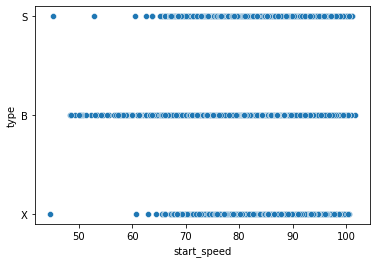

In [39]:
import seaborn as sns
sns.scatterplot(x=sub_set_one['start_speed'],y=sub_set_one['type'])

<AxesSubplot:xlabel='start_speed', ylabel='type'>

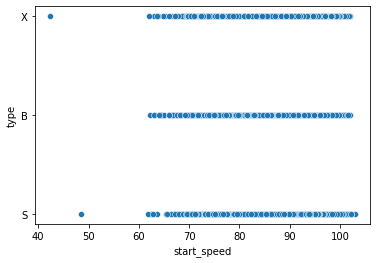

In [40]:
sns.scatterplot(x=sub_set_two['start_speed'],y=sub_set_two['type'])

<AxesSubplot:xlabel='start_speed', ylabel='type'>

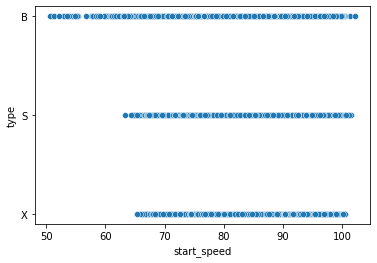

In [41]:
sns.scatterplot(x=sub_set_three['start_speed'],y=sub_set_three['type'])

<AxesSubplot:xlabel='start_speed', ylabel='type'>

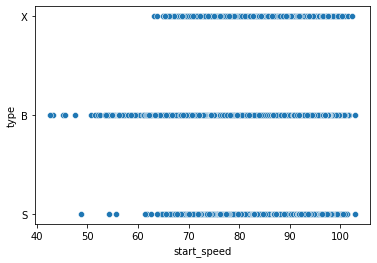

In [42]:
sns.scatterplot(x=sub_set_four['start_speed'],y=sub_set_four['type'])

<AxesSubplot:xlabel='start_speed', ylabel='type'>

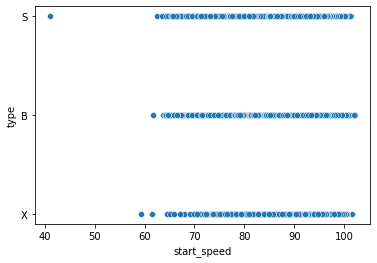

In [43]:
sns.scatterplot(x=sub_set_five['start_speed'],y=sub_set_five['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

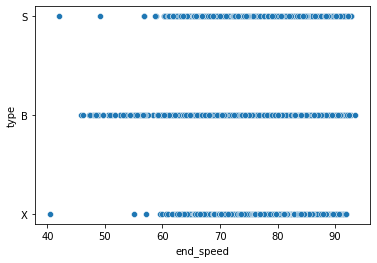

In [44]:
sns.scatterplot(x=sub_set_one['end_speed'],y=sub_set_one['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

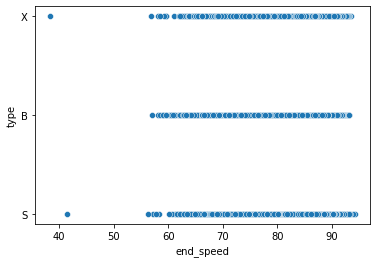

In [45]:
sns.scatterplot(x=sub_set_two['end_speed'],y=sub_set_two['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

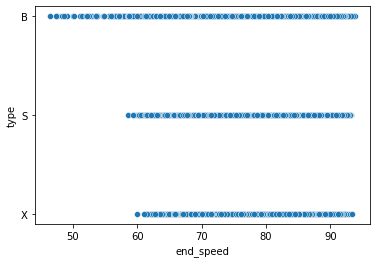

In [46]:
sns.scatterplot(x=sub_set_three['end_speed'],y=sub_set_three['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

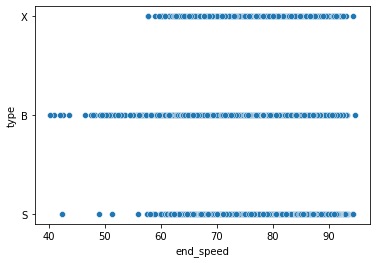

In [47]:
sns.scatterplot(x=sub_set_four['end_speed'],y=sub_set_four['type'])

<AxesSubplot:xlabel='end_speed', ylabel='type'>

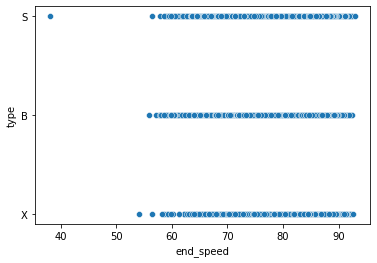

In [48]:
sns.scatterplot(x=sub_set_five['end_speed'],y=sub_set_five['type'])

<AxesSubplot:xlabel='nasty', ylabel='type'>

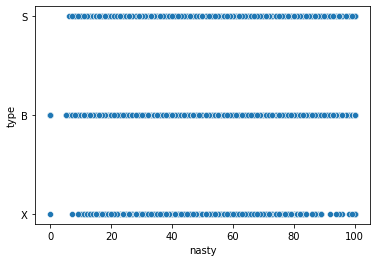

In [49]:
sns.scatterplot(x=sub_set_one['nasty'],y=sub_set_one['type'])

<AxesSubplot:xlabel='nasty', ylabel='type'>

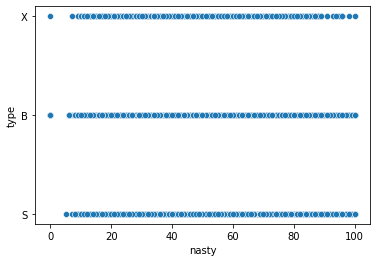

In [50]:
sns.scatterplot(x=sub_set_two['nasty'],y=sub_set_two['type'])

<AxesSubplot:xlabel='nasty', ylabel='type'>

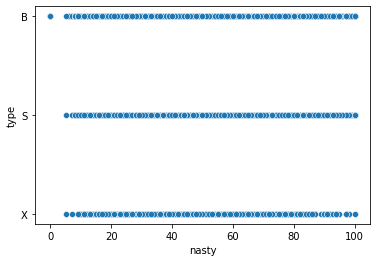

In [51]:
sns.scatterplot(x=sub_set_three['nasty'],y=sub_set_three['type'])

<AxesSubplot:xlabel='nasty', ylabel='type'>

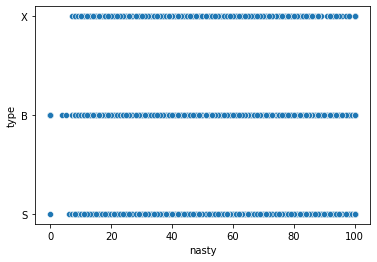

In [52]:
sns.scatterplot(x=sub_set_four['nasty'],y=sub_set_four['type'])

<AxesSubplot:xlabel='nasty', ylabel='type'>

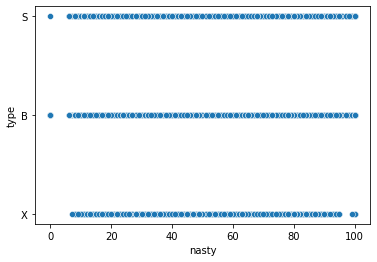

In [53]:
sns.scatterplot(x=sub_set_five['nasty'],y=sub_set_five['type'])

<AxesSubplot:xlabel='zone', ylabel='type'>

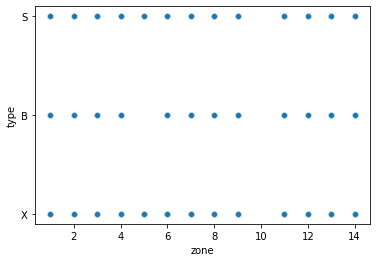

In [54]:
sns.scatterplot(x=sub_set_one['zone'],y=sub_set_one['type'])

<AxesSubplot:xlabel='zone', ylabel='type'>

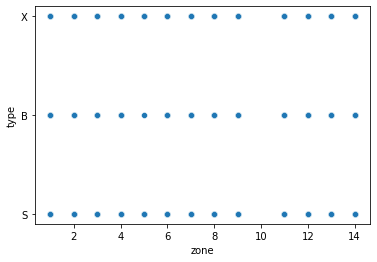

In [55]:
sns.scatterplot(x=sub_set_two['zone'],y=sub_set_two['type'])

<AxesSubplot:xlabel='zone', ylabel='type'>

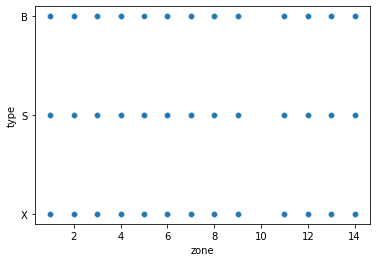

In [56]:
sns.scatterplot(x=sub_set_three['zone'],y=sub_set_three['type'])

<AxesSubplot:xlabel='zone', ylabel='type'>

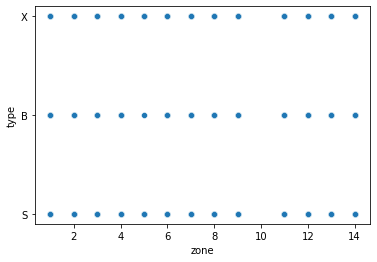

In [57]:
sns.scatterplot(x=sub_set_four['zone'],y=sub_set_four['type'])

<AxesSubplot:xlabel='zone', ylabel='type'>

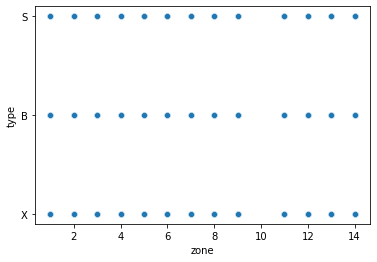

In [58]:
sns.scatterplot(x=sub_set_five['zone'],y=sub_set_five['type'])

In [ ]:
sns.scatterplot(x=sub_set_one['x0'],y=df['type'])

In [ ]:
sns.scatterplot(x=df['y0'],y=df['type'])

In [ ]:
df.break_length

In [ ]:
sns.distplot(df.break_length)